<a href="https://colab.research.google.com/github/tccnchsu/PDE/blob/main/A_sine_function_can_be_approximated_by_a_series_of_Gaussian_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code defines the gaussian_1d function and a 1D convolution function convolve_1d. In the example, a square wave is generated as the input signal and convolved with the Gaussian kernel generated by the gaussian_1d function. Finally, it plots the original signal and the convolved signal.

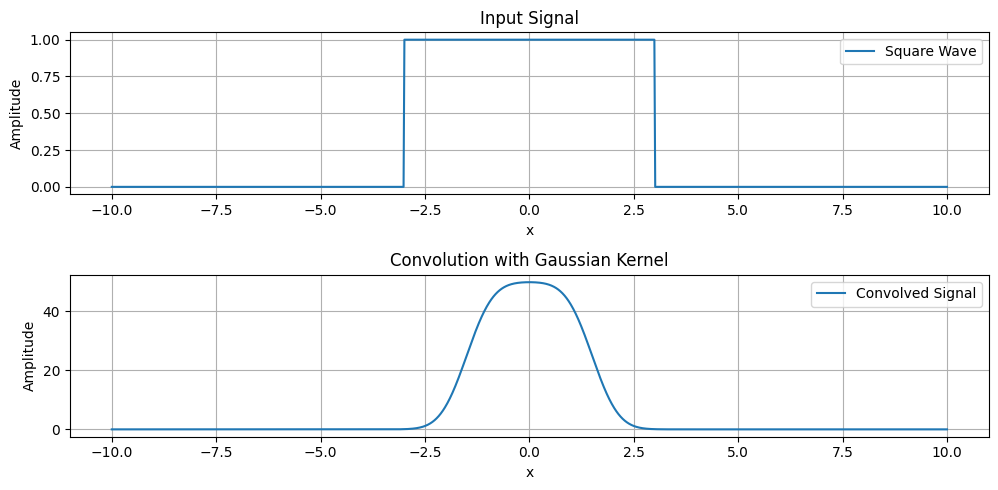

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian function with amplitude parameter
def gaussian_1d(x, x0, sigma, amplitude):
    exponent = -((x - x0) ** 2) / (2 * sigma ** 2)
    return amplitude * np.exp(exponent) / (np.sqrt(2 * np.pi) * sigma)

# Define 1D convolution function
def convolve_1d(signal, kernel):
    # Get sizes
    signal_len = len(signal)
    kernel_len = len(kernel)

    # Compute convolution size
    conv_size = signal_len + kernel_len - 1

    # Initialize convolution result
    result = np.zeros(conv_size)

    # Flip the kernel
    kernel = np.flip(kernel)

    # Perform convolution
    for i in range(conv_size):
        for j in range(kernel_len):
            if (i - j) >= 0 and (i - j) < signal_len:
                result[i] += signal[i - j] * kernel[j]

    return result

# Example: Convolution of a square wave with Gaussian function
x_values = np.linspace(-10, 10, 1000)  # Generating x values from -10 to 10
square_wave = np.where(np.abs(x_values) <= 3, 1.0, 0.0)  # Generating a square wave
gaussian_kernel = gaussian_1d(x_values, 0, 1, 1)  # Gaussian kernel

# Convolve square wave with Gaussian kernel
convolved_signal = convolve_1d(square_wave, gaussian_kernel)

# Adjust x-values array
adjusted_x_values = np.linspace(-10, 10, len(convolved_signal))

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(x_values, square_wave, label='Square Wave')
plt.title('Input Signal')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(adjusted_x_values, convolved_signal, label='Convolved Signal')
plt.title('Convolution with Gaussian Kernel')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Certainly! A sine function can be approximated by a series of Gaussian functions through a process known as the Fourier transform. The Fourier transform allows us to decompose a function into a series of sinusoidal components, each with its own frequency, phase, and amplitude.

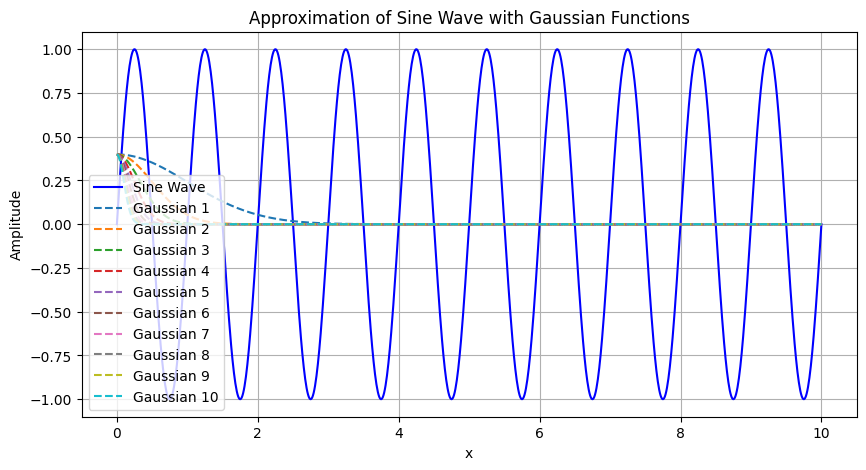

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian function with amplitude parameter
def gaussian_1d(x, x0, sigma, amplitude):
    exponent = -((x - x0) ** 2) / (2 * sigma ** 2)
    return amplitude * np.exp(exponent) / (np.sqrt(2 * np.pi) * sigma)

# Define the sine function
def sine_function(x, frequency, phase, amplitude):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase)

# Generate x values
x_values = np.linspace(0, 10, 1000)

# Define parameters for sine function
frequency = 1     # Frequency of the sine wave
phase = 0         # Phase of the sine wave
amplitude = 1     # Amplitude of the sine wave

# Generate sine wave
sine_wave = sine_function(x_values, frequency, phase, amplitude)

# Plot the sine wave
plt.figure(figsize=(10, 5))
plt.plot(x_values, sine_wave, label='Sine Wave', color='blue')

# Approximate the sine wave with Gaussian functions
num_gaussians = 10  # Number of Gaussian functions to approximate
for i in range(num_gaussians):
    gaussian_frequency = frequency * (i + 1)  # Adjust frequency for each Gaussian
    gaussian_amplitude = 1 / (i + 1)          # Adjust amplitude for each Gaussian
    gaussian_sigma = 1 / (i + 1)              # Adjust sigma for each Gaussian
    gaussian_wave = gaussian_1d(x_values, x0=0, sigma=gaussian_sigma, amplitude=gaussian_amplitude)
    plt.plot(x_values, gaussian_wave, label=f'Gaussian {i+1}', linestyle='--')

plt.title('Approximation of Sine Wave with Gaussian Functions')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In this example, we define a Gaussian Mixture Model using the gaussian_mixture_model function. The model consists of multiple Gaussian components defined by their means, standard deviations (sigmas), and weights. We then generate the Gaussian Mixture Model and plot it along with its individual Gaussian components. Adjusting the parameters such as the number of components, means, sigmas, and weights allows us to create different Gaussian Mixture Models.

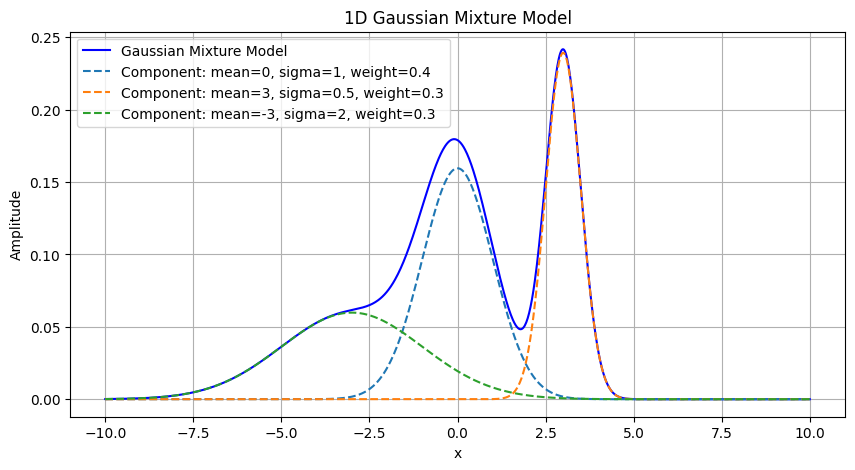

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian function with amplitude parameter
def gaussian_1d(x, x0, sigma, amplitude):
    exponent = -((x - x0) ** 2) / (2 * sigma ** 2)
    return amplitude * np.exp(exponent) / (np.sqrt(2 * np.pi) * sigma)

# Define 1D Gaussian Mixture Model
def gaussian_mixture_model(x, means, sigmas, weights):
    mixture = np.zeros_like(x)
    for mean, sigma, weight in zip(means, sigmas, weights):
        mixture += gaussian_1d(x, mean, sigma, weight)
    return mixture

# Generate x values
x_values = np.linspace(-10, 10, 1000)

# Define parameters for Gaussian Mixture Model
num_components = 3
means = [0, 3, -3]
sigmas = [1, 0.5, 2]
weights = [0.4, 0.3, 0.3]

# Generate Gaussian Mixture Model
gmm_values = gaussian_mixture_model(x_values, means, sigmas, weights)

# Plot the Gaussian Mixture Model
plt.figure(figsize=(10, 5))
plt.plot(x_values, gmm_values, label='Gaussian Mixture Model', color='blue')

# Plot individual Gaussian components
for mean, sigma, weight in zip(means, sigmas, weights):
    component = gaussian_1d(x_values, mean, sigma, weight)
    plt.plot(x_values, component, label=f'Component: mean={mean}, sigma={sigma}, weight={weight}', linestyle='--')

plt.title('1D Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In this example, we first generate synthetic data from a known Gaussian Mixture Model. Then, we use the Expectation-Maximization (EM) algorithm to estimate the parameters (means, sigmas, and weights) of the Gaussian Mixture Model from the observed data. Finally, we compare the true model with the estimated model by plotting their probability density functions. Adjusting the initial guess and number of iterations in the EM algorithm can improve the accuracy of the parameter estimation.

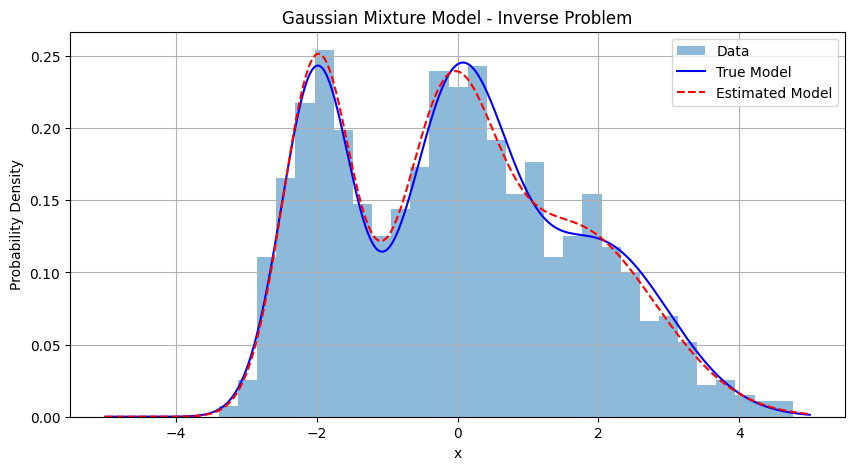

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the Gaussian function with amplitude parameter
def gaussian_1d(x, x0, sigma, amplitude):
    exponent = -((x - x0) ** 2) / (2 * sigma ** 2)
    return amplitude * np.exp(exponent) / (np.sqrt(2 * np.pi) * sigma)

# Define 1D Gaussian Mixture Model
def gaussian_mixture_model(x, means, sigmas, weights):
    mixture = np.zeros_like(x)
    for mean, sigma, weight in zip(means, sigmas, weights):
        mixture += gaussian_1d(x, mean, sigma, weight)
    return mixture

# Generate synthetic data from a Gaussian Mixture Model
np.random.seed(0)
true_means = [-2, 0, 2]
true_sigmas = [0.5, 0.7, 1]
true_weights = [0.3, 0.4, 0.3]
num_samples = 1000

# Generate data points
data = np.concatenate([np.random.normal(mean, sigma, int(weight * num_samples)) for mean, sigma, weight in zip(true_means, true_sigmas, true_weights)])

# Initial guess for parameters (randomly chosen)
initial_means = [-1, 0, 1]
initial_sigmas = [1, 1, 1]
initial_weights = [0.3, 0.3, 0.4]

# Perform Expectation-Maximization (EM) algorithm to estimate parameters
def expectation_maximization(data, initial_means, initial_sigmas, initial_weights, num_iterations=100):
    means = np.array(initial_means)
    sigmas = np.array(initial_sigmas)
    weights = np.array(initial_weights)

    num_components = len(means)
    num_data = len(data)

    for _ in range(num_iterations):
        # E-step: compute responsibility matrix
        resp = np.zeros((num_data, num_components))
        for i in range(num_components):
            resp[:, i] = norm.pdf(data, loc=means[i], scale=sigmas[i]) * weights[i]
        resp /= resp.sum(axis=1, keepdims=True)

        # M-step: update parameters
        weights = resp.sum(axis=0) / num_data
        means = np.dot(resp.T, data) / resp.sum(axis=0)
        sigmas = np.sqrt(np.sum(resp * (data[:, np.newaxis] - means) ** 2, axis=0) / (resp.sum(axis=0)))

    return means, sigmas, weights

estimated_means, estimated_sigmas, estimated_weights = expectation_maximization(data, initial_means, initial_sigmas, initial_weights)

# Plot original data and estimated Gaussian Mixture Model
x_values = np.linspace(-5, 5, 1000)
plt.figure(figsize=(10, 5))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(x_values, gaussian_mixture_model(x_values, true_means, true_sigmas, true_weights), color='blue', label='True Model')
plt.plot(x_values, gaussian_mixture_model(x_values, estimated_means, estimated_sigmas, estimated_weights), color='red', linestyle='--', label='Estimated Model')
plt.title('Gaussian Mixture Model - Inverse Problem')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
